In [40]:
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import datetime
import cv2
import numpy as np
import os

In [41]:
def imgLd(dn):
    path = "./"+dn+"/image/"
    files = os.listdir(path)
    data=[]
    for filename in files:
        I = cv2.imread(path+filename) 
        data.append(I)
    print(path+" load completed")
    return data

In [42]:
def labLd(dn):
    path = "./"+dn+"/label/"
    files = os.listdir(path)
    data=[]
    for filename in files:
        f = open(path+filename) 
        label=int(f.read())
        data.append(label)
    print(path+" load completed")
    return data

In [43]:
x_train=imgLd("train")
x_test=imgLd("test")
x_valid=imgLd("valid")

./train/image/ load completed
./test/image/ load completed
./valid/image/ load completed


In [44]:
y_train=labLd("train")
y_test=labLd("test")
y_valid=labLd("valid")

./train/label/ load completed
./test/label/ load completed
./valid/label/ load completed


### Explore the data 

Try to figure out how much different type do we have and what is the shape of input, we should normalize the data size first

In [7]:
#find the size of the data
print(
max(y_train),
min(y_train))
print(
max(y_test),
min(y_test))
print(
max(y_valid),
min(y_valid))

42 0
42 0
42 0


In [8]:
#check if the shape are all the same
print(x_train[1].shape)
for i in range(1,len(x_train)):
    if x_train[i].shape!=x_train[i-1].shape:
        print("Wrong")
print("Yes, all shapes are the same")

(32, 32, 3)
Yes, all shapes are the same


In [9]:
#check if the shape are all the same
print(x_test[1].shape)
for i in range(1,len(x_test)):
    if x_test[i].shape!=x_test[i-1].shape:
        print("Wrong")
print("Yes, all shapes are the same")

(32, 32, 3)
Yes, all shapes are the same


In [10]:
#check if the shape are all the same
print(x_valid[1].shape)
for i in range(1,len(x_valid)):
    if x_valid[i].shape!=x_valid[i-1].shape:
        print("Wrong")
print("Yes, all shapes are the same")

(32, 32, 3)
Yes, all shapes are the same


In [11]:
#find the size of sets
print(len(x_train),len(x_test),len(x_valid))

34799 12630 4410


In [45]:
y_train= np.array(y_train)
y_test= np.array(y_test)
y_valid= np.array(y_valid)
x_train= np.array(x_train)
x_test= np.array(x_test)
x_valid= np.array(x_valid)

In [50]:
def dtsvg(index,x_train,y_train):
    for i in range(len(x_train)):
        if y_train[i]==index:
            plt.imsave(str(index)+".png",x_train[i])
            #print("The shape of the category"+str(index)+" is "+str(x_train[i].shape))
            return

In [51]:
for i in range(43):
    dtsvg(i,x_train,y_train)

### CNN model

In [266]:
adam=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.8,
    beta_2=0.999,
    epsilon=1e-8,
    amsgrad=False,
    name="Adam"
)

In [267]:
model1=keras.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=150,kernel_size=4,activation='tanh',input_shape=(32,32,3),padding='SAME'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(filters=100,kernel_size=4,activation='sigmoid',padding='SAME'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(filters=100,kernel_size=2,activation='relu',padding='SAME'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(filters=100,kernel_size=2,activation='relu',padding='SAME'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(rate=0.25))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128,activation='relu'))
model1.add(tf.keras.layers.Dense(128,activation='tanh'))
model1.add(tf.keras.layers.Dense(43,activation='softmax'))
model1.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1.fit(x_train,y_train,batch_size=500,epochs=10,validation_data=(x_valid,y_valid),shuffle=True,validation_freq=1)

Epoch 1/10
70/70 [==============================] - 115s 2s/step - loss: 3.0089 - accuracy: 0.1750 - val_loss: 2.2091 - val_accuracy: 0.3141
Epoch 2/10
70/70 [==============================] - 116s 2s/step - loss: 1.5415 - accuracy: 0.5145 - val_loss: 1.1710 - val_accuracy: 0.6304
Epoch 3/10
70/70 [==============================] - 117s 2s/step - loss: 0.7017 - accuracy: 0.7982 - val_loss: 0.4968 - val_accuracy: 0.8565
Epoch 4/10
70/70 [==============================] - 116s 2s/step - loss: 0.2625 - accuracy: 0.9387 - val_loss: 0.2781 - val_accuracy: 0.9315
Epoch 5/10
70/70 [==============================] - 115s 2s/step - loss: 0.1256 - accuracy: 0.9744 - val_loss: 0.1970 - val_accuracy: 0.9546
Epoch 6/10
70/70 [==============================] - 115s 2s/step - loss: 0.0738 - accuracy: 0.9858 - val_loss: 0.1833 - val_accuracy: 0.9551
Epoch 7/10
70/70 [==============================] - 116s 2s/step - loss: 0.0685 - accuracy: 0.9854 - val_loss: 0.2022 - val_accuracy: 0.9503
Epoch 8/10
70

In [268]:
model1.evaluate(x_test,y_test)

395/395 [==============================] - 13s 33ms/step - loss: 0.1550 - accuracy: 0.9580


[0.15498684346675873, 0.9580364227294922]

In [269]:
model1.summary(line_length=120,positions=[0.30,0.60,0.7,1.])

Model: "sequential_37"
________________________________________________________________________________________________________________________
Layer (type)                        Output Shape                        Param #     
conv2d_111 (Conv2D)                 (None, 32, 32, 150)                 7350        
________________________________________________________________________________________________________________________
max_pooling2d_109 (MaxPooling2D)    (None, 16, 16, 150)                 0           
________________________________________________________________________________________________________________________
conv2d_112 (Conv2D)                 (None, 16, 16, 100)                 240100      
________________________________________________________________________________________________________________________
max_pooling2d_110 (MaxPooling2D)    (None, 8, 8, 100)                   0           
____________________________________________________________________

In [270]:
from PIL import Image

In [273]:
def imgPr(name):
    im=Image.open(name)
    if len(im.split())==4:
        r, g, b, a = im.split()
        I = Image.merge("RGB", (r, g, b))
        I.save(name)
    im=tf.io.gfile.GFile(name,'rb').read()
    I=tf.image.decode_jpeg(im)
    I=tf.image.convert_image_dtype(I, dtype = tf.float64)
    I=tf.image.resize(I, (32,32))
    plt.imshow(I)
    I=np.expand_dims(I,axis=0)
    print(I.shape)
    print(model1.predict(I))
    print(model1.predict(I).argmax())

(1, 32, 32, 3)
[[6.40392129e-04 1.36586325e-02 1.37187233e-02 1.17343047e-03
  8.93364777e-04 1.46904553e-03 5.19113289e-03 6.12266304e-04
  9.62866819e-04 1.79384646e-04 2.40139823e-04 4.43163590e-04
  1.45067684e-02 4.09902493e-03 1.31545938e-03 1.65979101e-04
  2.65909566e-05 1.25185295e-04 3.46325251e-05 3.93822324e-04
  8.96108904e-05 9.23048053e-03 7.31004169e-04 2.32443272e-04
  9.89023130e-04 8.35769402e-04 5.09352889e-04 4.58601950e-04
  1.36393774e-03 6.57216180e-04 6.52279181e-04 2.08062679e-03
  1.13969250e-02 5.11294752e-02 1.78124700e-02 2.72584617e-01
  3.04515306e-02 9.17778537e-02 3.72394244e-03 3.38013083e-01
  9.73785147e-02 6.42728386e-03 1.62404391e-03]]
39


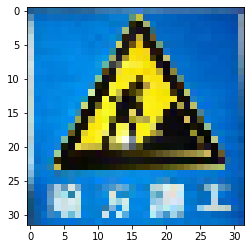

In [295]:
imgPr("t252.jpg")#change the name here to test different picture

### Gray model

In [255]:
def gimgLd(dn):
    path = "./"+dn+"/image/"
    files = os.listdir(path)
    data=[]
    for filename in files:
        I = cv2.imread(path+filename) 
        I=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
        data.append(I)
    print(path+" load completed")
    return data

In [179]:
x_train2=imgLd("train")

./train/image/ load completed


In [180]:
x_test2=imgLd("test")
x_valid2=imgLd("valid")

./test/image/ load completed
./valid/image/ load completed


In [181]:
x_train2= np.array(x_train2)
x_test2= np.array(x_test2)
x_valid2= np.array(x_valid2)

In [183]:
x_train2 = np.expand_dims(x_train2, axis=3)
x_test2 = np.expand_dims(x_test2, axis=3)
x_valid2 = np.expand_dims(x_valid2, axis=3)

In [194]:
model2=keras.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=150,kernel_size=5,activation='tanh',input_shape=(32,32,1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=100,kernel_size=2,activation='relu',padding='SAME'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=100,kernel_size=2,activation='sigmoid',padding='SAME'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Dropout(rate=0.25))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dense(128,activation='tanh'))
model2.add(tf.keras.layers.Dense(43,activation='softmax'))
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.fit(x_train2,y_train,batch_size=200,epochs=20,validation_data=(x_valid2,y_valid),shuffle=True,validation_freq=1)

Epoch 1/20
174/174 [==============================] - 42s 241ms/step - loss: 2.4981 - accuracy: 0.3395 - val_loss: 0.9807 - val_accuracy: 0.7603
Epoch 2/20
174/174 [==============================] - 42s 241ms/step - loss: 0.4650 - accuracy: 0.8870 - val_loss: 0.2858 - val_accuracy: 0.9229
Epoch 3/20
174/174 [==============================] - 42s 240ms/step - loss: 0.1684 - accuracy: 0.9619 - val_loss: 0.1730 - val_accuracy: 0.9515
Epoch 4/20
174/174 [==============================] - 42s 241ms/step - loss: 0.0942 - accuracy: 0.9794 - val_loss: 0.1517 - val_accuracy: 0.9562
Epoch 5/20
174/174 [==============================] - 42s 240ms/step - loss: 0.0660 - accuracy: 0.9854 - val_loss: 0.1191 - val_accuracy: 0.9683
Epoch 6/20
174/174 [==============================] - 42s 241ms/step - loss: 0.0534 - accuracy: 0.9878 - val_loss: 0.1417 - val_accuracy: 0.9594
Epoch 7/20
174/174 [==============================] - 45s 260ms/step - loss: 0.0473 - accuracy: 0.9888 - val_loss: 0.1354 - val_ac

In [195]:
model2.evaluate(x_test2,y_test)

395/395 [==============================] - 7s 18ms/step - loss: 0.1800 - accuracy: 0.9505


[0.1799629032611847, 0.9505146741867065]

In [221]:
model2.summary(line_length=120,positions=[0.30,0.60,0.7,1.])

Model: "sequential_35"
________________________________________________________________________________________________________________________
Layer (type)                        Output Shape                        Param #     
conv2d_104 (Conv2D)                 (None, 28, 28, 150)                 3900        
________________________________________________________________________________________________________________________
max_pooling2d_102 (MaxPooling2D)    (None, 14, 14, 150)                 0           
________________________________________________________________________________________________________________________
conv2d_105 (Conv2D)                 (None, 14, 14, 100)                 60100       
________________________________________________________________________________________________________________________
max_pooling2d_103 (MaxPooling2D)    (None, 7, 7, 100)                   0           
____________________________________________________________________

In [232]:
def gimgPr(name):
    im=Image.open(name)
    I = im.convert('L')
    I.save("g"+name)
    im=tf.io.gfile.GFile("g"+name,'rb').read()
    I=tf.image.decode_jpeg(im)
    I=tf.image.convert_image_dtype(I, dtype = tf.float64)
    I=tf.image.resize(I, (32,32))
    #plt.imshow(I)
    I=np.expand_dims(I,axis=0)
    print(I.shape)
    print(model2.predict(I))
    print(model2.predict(I).argmax())

In [304]:
gimgPr("t252.jpg")#change the name here to test different picture

(1, 32, 32, 1)
[[2.0351833e-06 8.9627692e-06 9.8614029e-05 7.6717168e-01 1.7562330e-07
  6.9760997e-04 4.6965745e-04 2.9120033e-06 1.3460955e-04 2.2656710e-05
  9.4613868e-05 1.7820009e-03 5.1750807e-04 2.3161140e-03 3.0368019e-04
  1.0669702e-05 2.4607796e-05 8.8880658e-03 6.6000468e-04 4.8274058e-05
  1.1076160e-03 3.9261842e-05 4.4528273e-04 4.8581251e-06 7.5934964e-05
  1.1868071e-03 2.1780073e-03 1.0223526e-06 4.5905556e-03 1.2297188e-04
  7.9696421e-03 2.0571692e-06 1.4617528e-01 2.1031691e-02 8.0889912e-04
  1.3380756e-03 7.7745053e-03 1.1049495e-02 2.2892931e-05 6.9172154e-03
  2.0183579e-04 3.4446013e-03 2.5704320e-04]]
3


Example of grey input

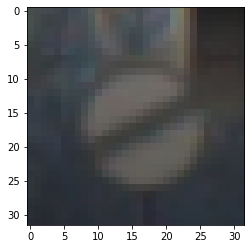

In [264]:
image=x_train[260]
plt.imshow(image) 

In [256]:
x_train3=gimgLd("train")

./train/image/ load completed


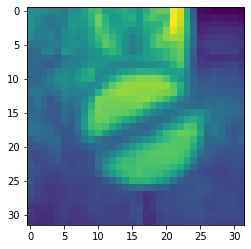

In [265]:
image=x_train3[260]
plt.imshow(image) 